## Machine Learning Model Building Pipeline: Feature Engineering

Cada uno de los pasos en la tubería de construcción del modelo de Machine Learning:
1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building


## House Prices dataset: Feature Engineering

Procesaremos previamente las variables del conjunto de datos de precios de la vivienda de Kaggle. Diseñaremos las variables para que abordemos:

1. Missing values
2. Temporal variables
3. Non-Gaussian distributed variables
4. Categorical variables: remove rare labels
5. Categorical variables: convert strings to numbers
5. Standarise the values of the variables to the same range

### Seteando las semillas

Por lo tanto, de ahora en adelante, para cada paso que incluya algún elemento de aleatoriedad, es extremadamente importante que **establezcamos la semilla**. De esta manera, podemos obtener reproducibilidad entre nuestra investigación y nuestro código de desarrollo.

In [21]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.simplefilter(action='ignore')

In [23]:
# load dataset
data = pd.read_csv('houseprice.csv')
print(data.shape)
data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



## Separar el conjunto de datos en train y test

Antes de comenzar a diseñar nuestras características, es importante separar nuestro conjunto de prueba y entrenamiento de introducción de datos. Cuando diseñamos características, algunas técnicas aprenden parámetros de los datos. Es importante aprender estos parámetros solo del conjunto de train. Esto es para evitar el ajuste excesivo.

**Separar los datos en train y test implica aleatoriedad, por lo tanto, necesitamos establecer la semilla.**

In [24]:
# Separemos en train y test
# Recuerde configurar la semilla (random_state para esta función sklearn)

X_train, X_test, y_train, y_test = train_test_split(data,
                                                    data['SalePrice'],
                                                    test_size=0.1,
                                                    # we are setting the seed here:
                                                    random_state=0)  

X_train.shape, X_test.shape

((1314, 81), (146, 81))

## Missing values

### Variables Categoricas
Para las variables categóricas, reemplazaremos los valores faltantes con la string "missing".

In [25]:
# Hacemos una lista de las variables categoricas con missings

vars_with_na = [
    var for var in data.columns
    if X_train[var].isnull().sum() > 0 and X_train[var].dtypes == 'O'
]

# Imprimimos el porcentaje de  missing values por variable
X_train[vars_with_na].isnull().mean()

Alley           0.938356
MasVnrType      0.004566
BsmtQual        0.024353
BsmtCond        0.024353
BsmtExposure    0.025114
BsmtFinType1    0.024353
BsmtFinType2    0.025114
Electrical      0.000761
FireplaceQu     0.472603
GarageType      0.056317
GarageFinish    0.056317
GarageQual      0.056317
GarageCond      0.056317
PoolQC          0.995434
Fence           0.814307
MiscFeature     0.961187
dtype: float64

In [26]:
# replazamos el valor missing con la etiqueta: "Missing"


X_train[vars_with_na] = X_train[vars_with_na].fillna('Missing')
X_test[vars_with_na] = X_test[vars_with_na].fillna('Missing')

In [27]:
# check that we have no missing information in the engineered variables
X_train[vars_with_na].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [28]:
# verificar que el conjunto de prueba no contenga valores nulos en la variables 
[var for var in vars_with_na if X_test[var].isnull().sum() > 0]

[]

### Variables numericas

Para diseñar valores faltantes en variables numéricas, haremos lo siguiente:

- agregar una variable indicadora de valor faltante binario
- y luego reemplace los valores que faltan en la variable original con el modo


In [29]:
# hacer una lista con las variables numéricas que contienen valores faltantes
vars_with_na = [
    var for var in data.columns
    if X_train[var].isnull().sum() > 0 and X_train[var].dtypes != 'O'
]

# imprimir porcentaje de valores perdidos por variable
X_train[vars_with_na].isnull().mean()

LotFrontage    0.177321
MasVnrArea     0.004566
GarageYrBlt    0.056317
dtype: float64

In [30]:
# replazamos los valores missing que describimos arriba 

for var in vars_with_na:

    # calcular el mode usando el conjunto de train
    mode_val = X_train[var].mode()[0]

    # agregar indicador binario 1 o 0 faltante (en train y prueba)
    X_train[var+'_na'] = np.where(X_train[var].isnull(), 1, 0)
    X_test[var+'_na'] = np.where(X_test[var].isnull(), 1, 0)

    # reemplaza los valores perdidos por el mode
    # (en train y test)
    X_train[var] = X_train[var].fillna(mode_val)
    X_test[var] = X_test[var].fillna(mode_val)

#comprobar que no tenemos más valores faltantes en las variables diseñadas
X_train[vars_with_na].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [31]:
# verificar que el conjunto de prueba no contenga valores nulos en las variables diseñadas

[vr for var in vars_with_na if X_test[var].isnull().sum() > 0]

[]

In [32]:
# chequear que en las variables de indicador binario para los valores missings

X_train[['LotFrontage_na', 'MasVnrArea_na', 'GarageYrBlt_na']].head()

,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
930,0,0,0
656,0,0,0
45,0,0,0
1348,1,0,0
55,0,0,0


## Variables temporales

### Captura el tiempo transcurrido

In [33]:
def elapsed_years(df, var):
    # capturar la diferencia entre la variable del año
    # y el año en que se vendió la casa
    df[var] = df['YrSold'] - df[var]
    return df

In [34]:
for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    X_train = elapsed_years(X_train, var)
    X_test = elapsed_years(X_test, var)

## Transformación de variables numéricas

Transformaremos logarítmicamente las variables numéricas positivas para obtener una distribución más gaussiana. Esto tiende a ayudar a los modelos de aprendizaje automático lineal.

In [35]:
for var in ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']:
    X_train[var] = np.log(X_train[var])
    X_test[var] = np.log(X_test[var])

In [36]:
# verifique que el conjunto de prueba no contenga valores nulos en las variables diseñadas
[var for var in ['LotFrontage', 'LotArea', '1stFlrSF',
                 'GrLivArea', 'SalePrice'] if X_test[var].isnull().sum() > 0]

[]

In [37]:
# lo mismo para el set train
[var for var in ['LotFrontage', 'LotArea', '1stFlrSF',
                 'GrLivArea', 'SalePrice'] if X_train[var].isnull().sum() > 0]

[]

## Variables categóricas

### Eliminación de etiquetas raras

Primero, agruparemos aquellas categorías dentro de las variables que están presentes en menos del 1% de las observaciones. Es decir, todos los valores de variables categóricas que son compartidos por menos del 1% de las casas, serán reemplazados por la cadena "Raro".

In [38]:
# capturemos las variables categóricas en una lista

cat_vars = [var for var in X_train.columns if X_train[var].dtype == 'O']

In [41]:
frequent_ls

Index(['Abnorml', 'Family', 'Normal', 'Partial'], dtype='object', name='SaleCondition')

In [40]:
def find_frequent_labels(df, var, rare_perc):
    
    # función encuentra las etiquetas que son compartidas por más de
    # un cierto % de las casas en el conjunto de datos

    df = df.copy()

    tmp = df.groupby(var)[var].count() / len(df)

    return tmp[tmp > rare_perc].index


for var in cat_vars:
    
    # encontrar las categorias frecuente
    frequent_ls = find_frequent_labels(X_train, var, 0.01)
    
    #reemplazar las categorias rare por el string string "Rare"
    X_train[var] = np.where(X_train[var].isin(frequent_ls), X_train[var], 'Rare')
    
    X_test[var] = np.where(X_test[var].isin(frequent_ls), X_test[var], 'Rare')

### Codificación de variables categóricas

A continuación, necesitamos transformar las cadenas de las variables categóricas en números. Lo haremos de forma que captemos la relación monótona entre la etiqueta y el target.

In [42]:
# esta función asignará valores discretos a las cadenas de las variables,
# para que el valor menor corresponda a la categoría que muestra el menor
# precio medio de venta de la casa

def replace_categories(train, test, var, target):

    # ordena las categorías en una variable a partir de la que tiene la menor
    # precio de venta de la casa, al de mayor
    ordered_labels = train.groupby(var)[target].mean().sort_values().index

    # Crea un diccionario ordenado por categorias a valores enteros
    ordinal_label = {k: i for i, k in enumerate(ordered_labels, 0)}

    # use el diccionario para reemplazar las cadenas categóricas por números enteros
    train[var] = train[var].map(ordinal_label)
    test[var] = test[var].map(ordinal_label)

In [43]:
for var in cat_vars:
    replace_categories(X_train, X_test, var, 'SalePrice')

In [44]:
# checquear la ausencia de  na en el set train 

[var for var in X_train.columns if X_train[var].isnull().sum() > 0]

[]

In [45]:
# chequear la ausencia de na en el set de test

[var for var in X_test.columns if X_test[var].isnull().sum() > 0]

[]

In [46]:
X_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
930,931,20,3,4.290459,9.096612,1,2,1,3,1,0,0,19,2,1,3,3,8,5,2,2,0,0,10,10,0,0.0,2,3,4,3,3,3,6,16,4,0,1450,1466,2,4,1,3,7.290293,0,0,7.290293,0,0,2,0,3,1,2,7,4,0,1,4,2.0,3,3,610,2,3,2,100,18,0,0,0,0,0,3,2,0,7,2009,2,3,12.211060,0,0,0
656,657,20,3,4.276666,9.211040,1,2,1,1,1,0,0,8,2,1,3,3,5,7,49,2,0,0,6,6,2,54.0,2,3,2,2,3,1,4,806,4,0,247,1053,2,4,1,3,6.959399,0,0,6.959399,1,0,1,1,3,1,2,5,4,0,1,4,49.0,2,1,312,2,3,2,0,0,0,0,0,0,0,2,2,0,8,2008,2,3,11.887931,0,0,0
45,46,120,3,4.110874,8.943506,1,2,0,1,1,0,0,21,2,1,4,3,9,5,5,5,2,0,3,2,2,412.0,3,3,4,4,3,1,6,456,4,0,1296,1752,2,4,1,3,7.468513,0,0,7.468513,1,0,2,0,2,1,3,6,4,1,4,4,5.0,2,2,576,2,3,2,196,82,0,0,0,0,0,3,2,0,2,2010,2,3,12.675764,0,0,0
1348,1349,20,3,4.094345,9.692520,1,2,2,2,1,0,0,10,2,1,3,3,7,5,9,9,0,0,10,10,0,0.0,2,3,4,3,3,4,6,1443,4,0,39,1482,2,4,1,3,7.309212,0,0,7.309212,1,0,2,0,3,1,2,5,4,1,2,4,9.0,2,2,514,2,3,2,402,25,0,0,0,0,0,3,2,0,8,2007,2,3,12.278393,1,0,0
55,56,20,3,4.605170,9.227689,1,2,1,1,1,0,0,8,2,1,3,3,6,5,44,44,0,0,6,7,2,272.0,1,3,2,2,3,1,2,490,4,0,935,1425,2,3,1,3,7.261927,0,0,7.261927,0,0,2,0,3,1,1,7,4,1,4,4,44.0,2,2,576,2,3,2,0,0,0,407,0,0,0,3,2,0,7,2008,2,3,12.103486,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,764,60,3,4.406719,9.151651,1,2,0,1,1,0,0,22,2,1,3,5,8,5,10,10,0,0,10,10,2,673.0,2,3,4,3,3,2,6,1163,4,0,89,1252,2,4,1,3,7.145196,1097,0,7.768533,1,0,2,1,3,1,2,8,4,1,4,4,10.0,2,3,856,2,3,2,0,128,0,0,180,0,0,3,2,0,7,2009,2,3,12.727838,0,0,0
835,836,20,3,4.094345,9.169518,1,2,0,1,1,0,0,6,2,1,3,3,4,7,60,15,0,0,10,6,0,0.0,1,3,2,3,3,1,2,442,4,0,625,1067,2,2,1,3,6.972606,0,0,6.972606,0,0,2,0,2,1,2,4,1,0,1,4,14.0,1,2,436,2,3,2,290,0,0,0,0,0,0,3,2,0,2,2010,2,3,11.759786,0,0,0
1216,1217,90,1,4.219508,9.097172,1,2,0,1,1,0,0,6,4,1,1,1,6,5,32,32,0,0,10,10,0,0.0,1,3,0,0,1,0,0,0,0,0,0,0,2,2,1,3,7.183871,584,0,7.550661,0,0,2,0,4,2,1,8,4,0,1,4,32.0,1,2,539,2,3,2,0,0,0,0,0,0,0,3,2,0,4,2010,2,3,11.626254,0,0,0
559,560,120,3,4.094345,8.069655,1,2,0,1,1,0,0,14,2,1,4,3,7,5,3,2,0,0,10,10,2,18.0,2,3,4,3,3,4,5,0,4,0,1374,1374,2,4,1,3,7.350516,0,0,7.350516,0,0,2,0,2,1,2,7,4,1,3,4,3.0,3,2,420,2,3,2,143,20,0,0,0,0,0,3,2,0,10,2006,2,3,12.363076,1,0,0


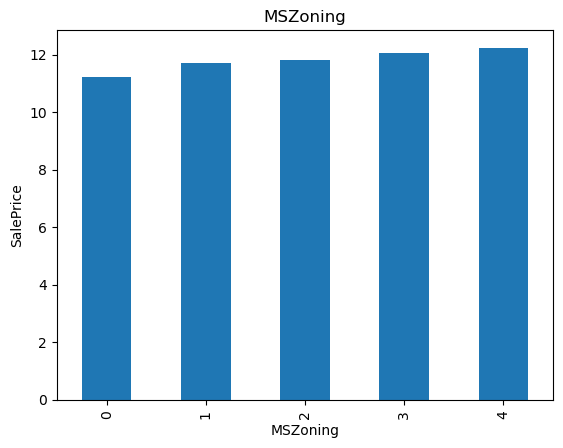

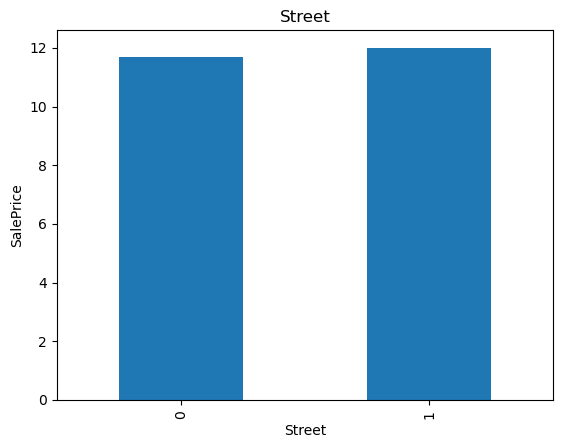

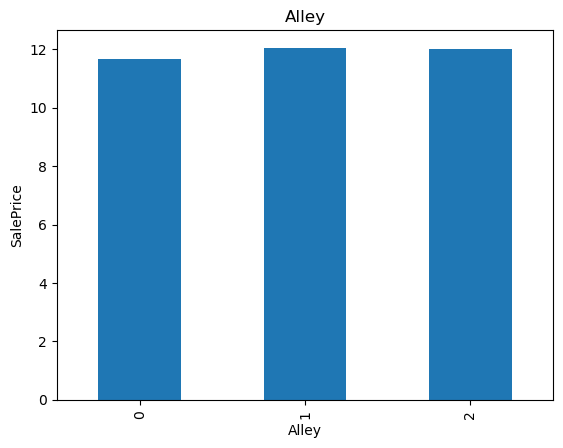

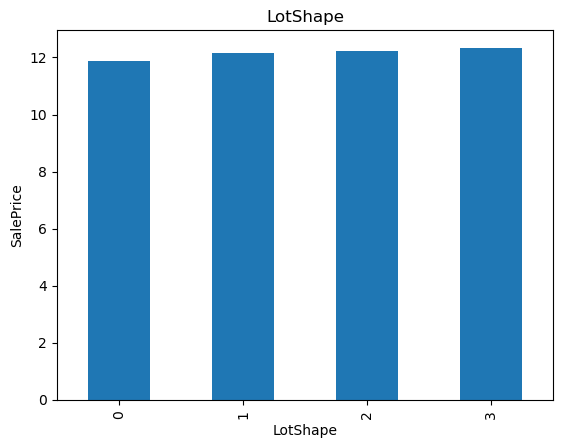

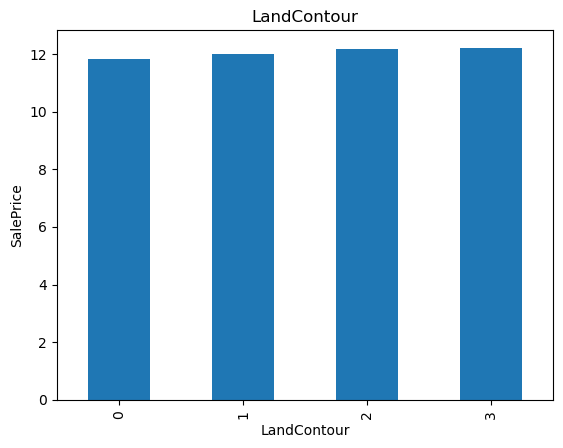

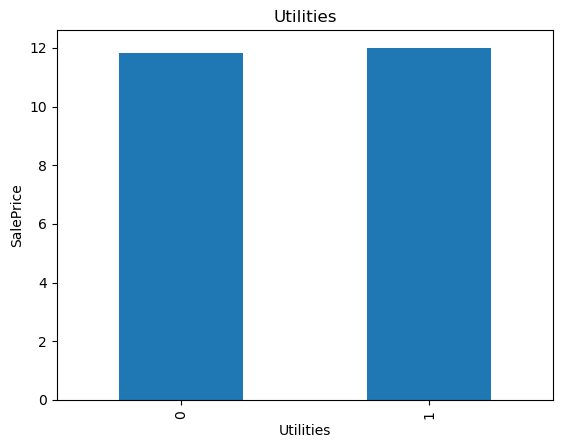

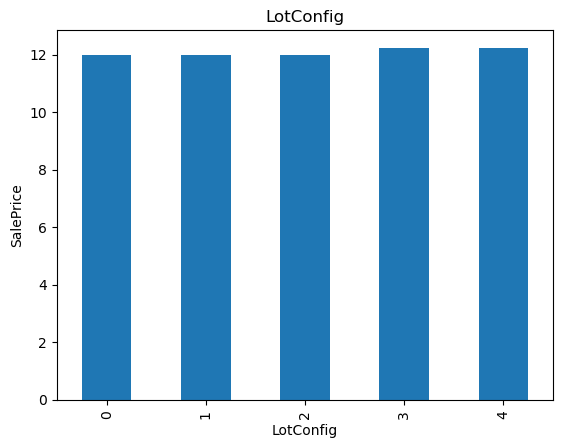

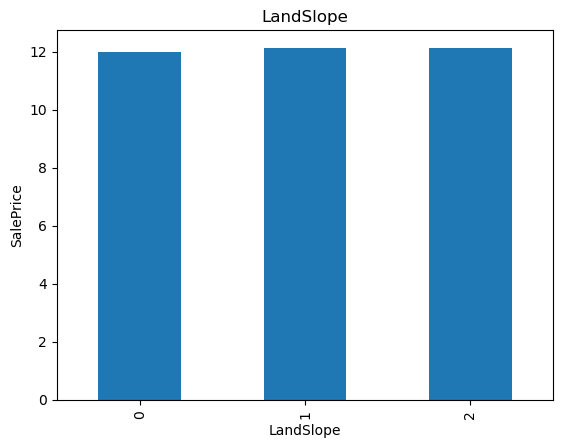

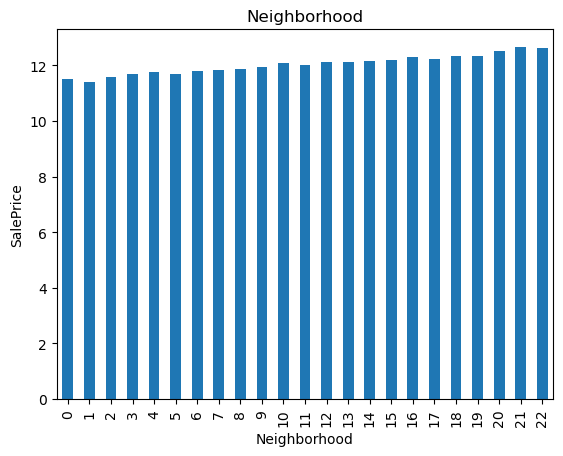

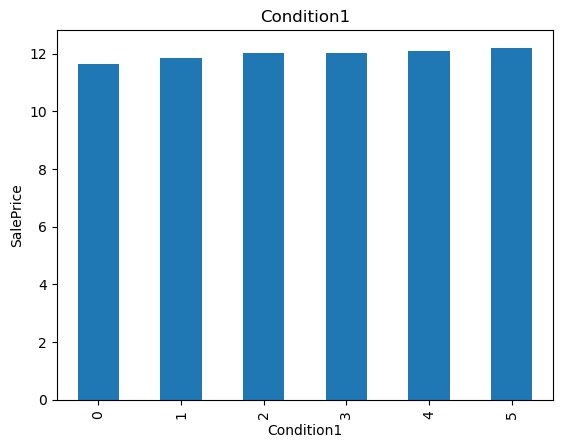

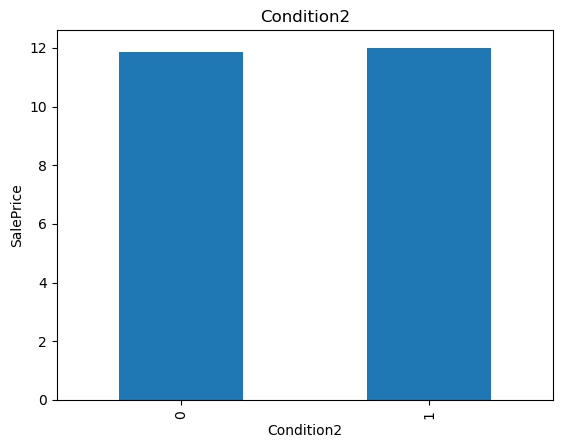

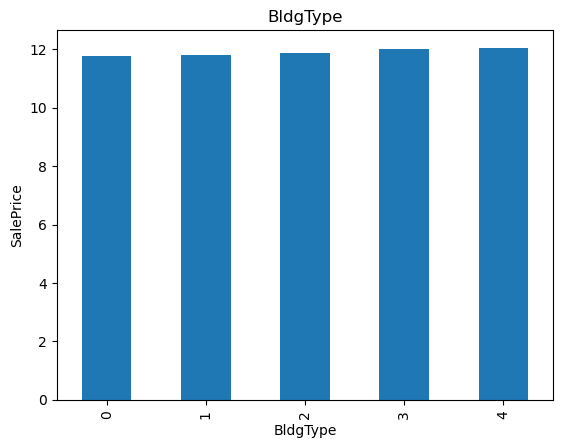

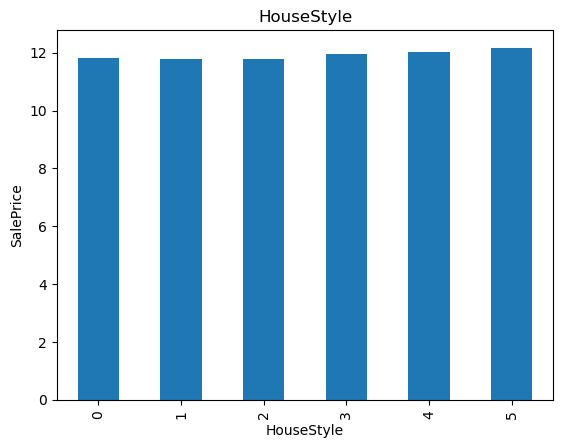

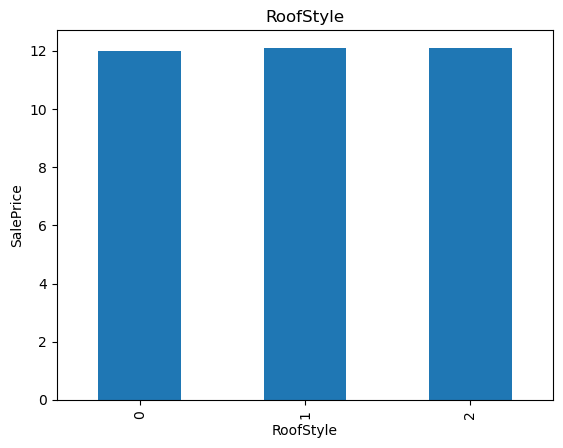

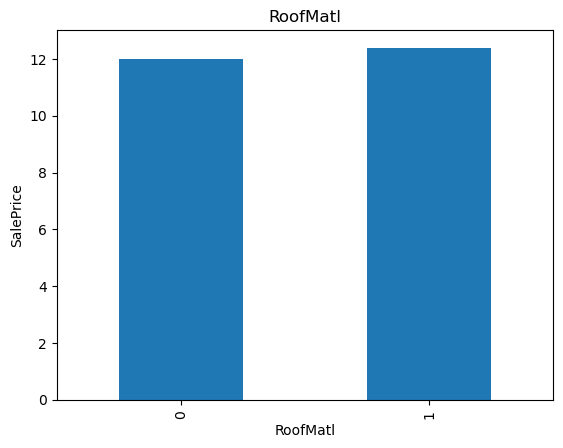

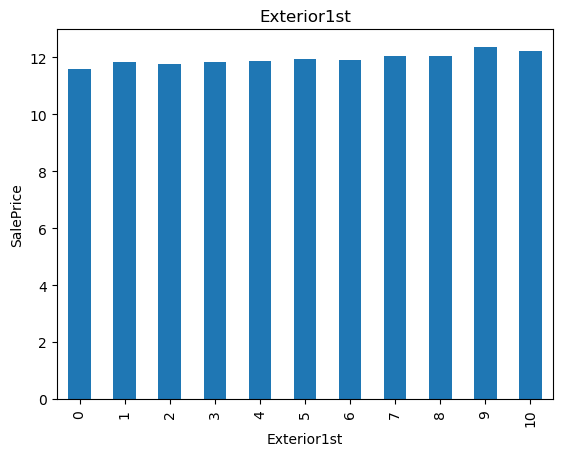

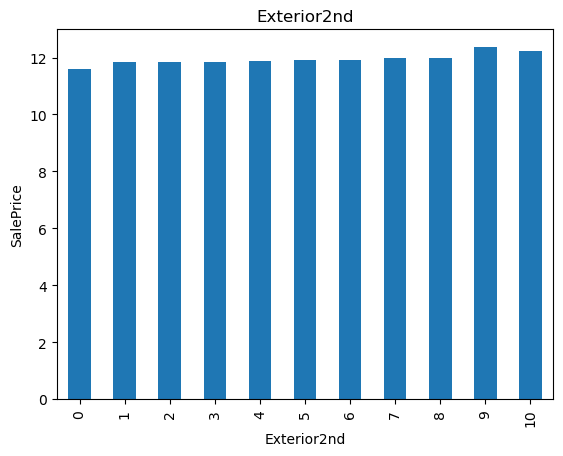

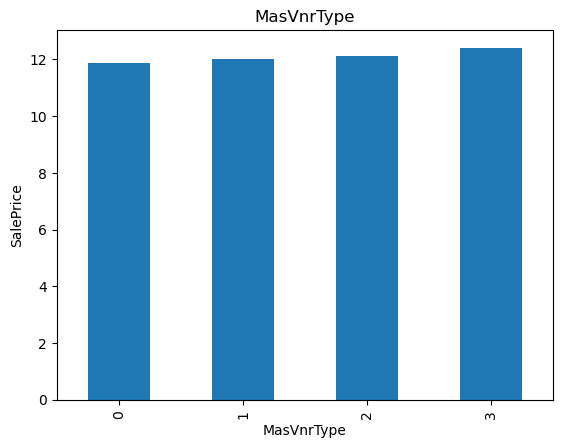

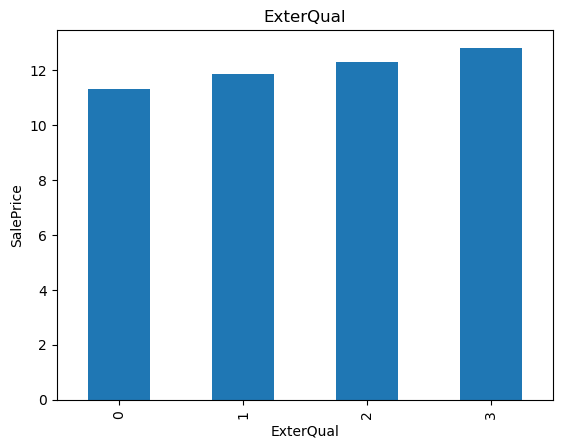

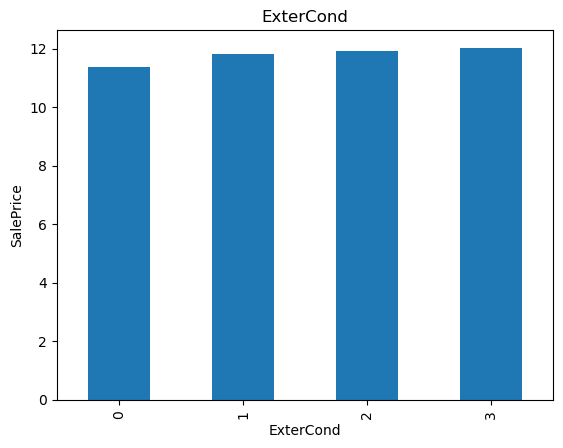

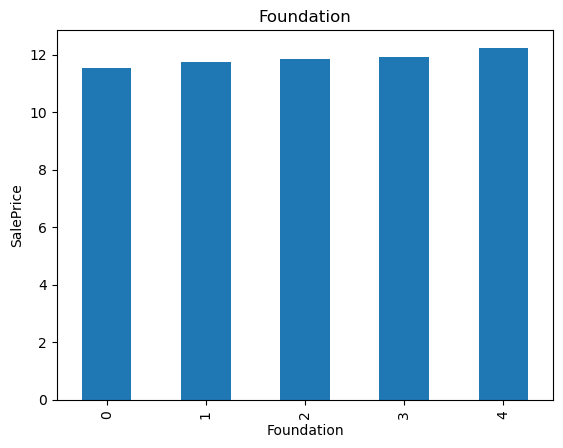

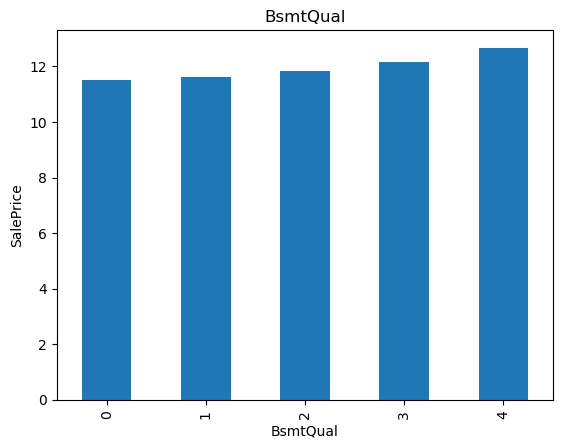

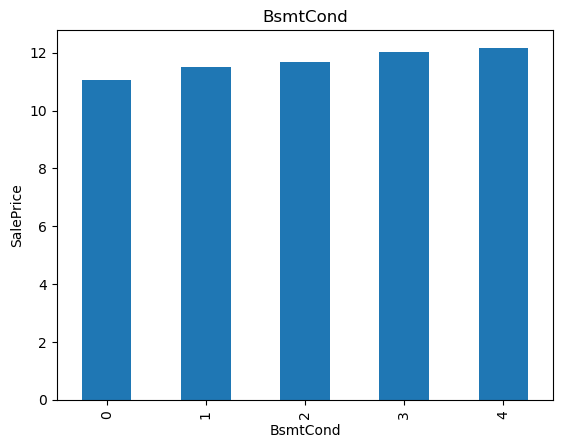

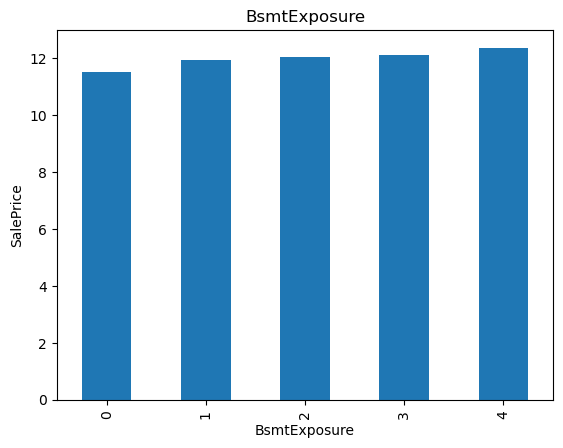

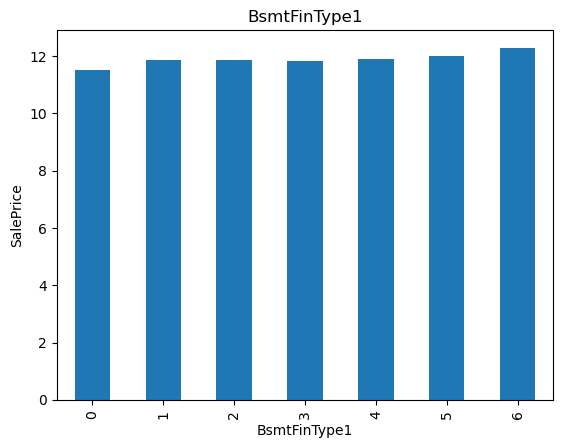

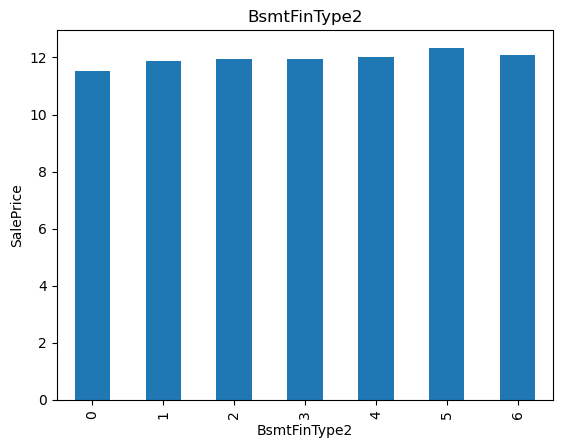

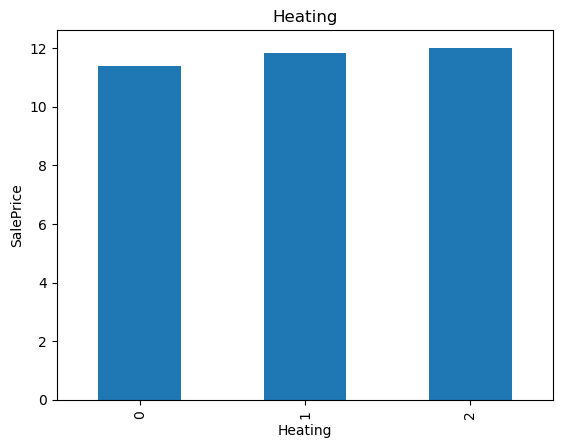

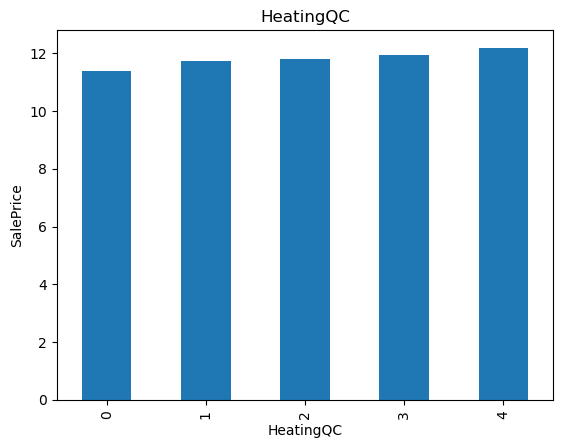

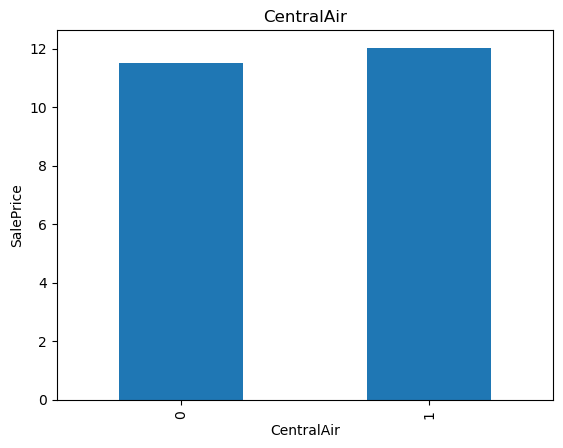

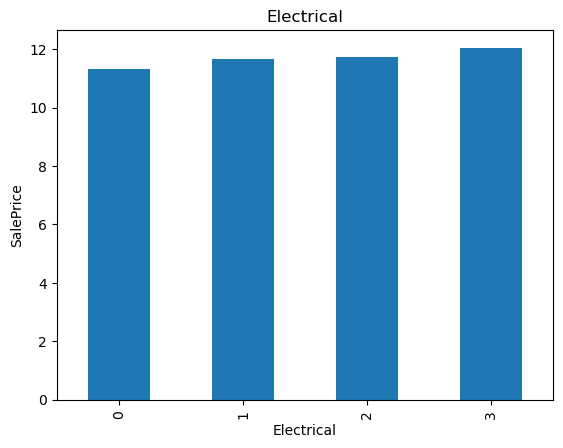

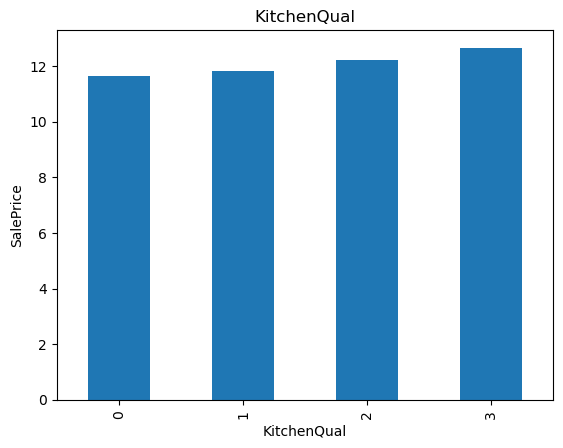

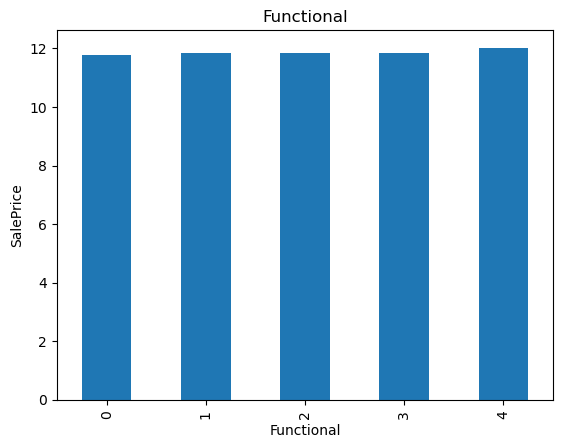

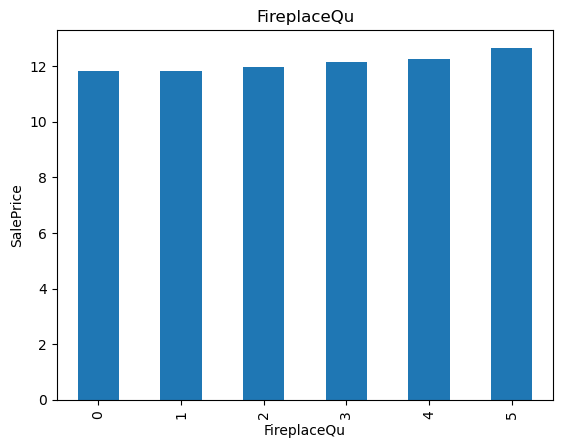

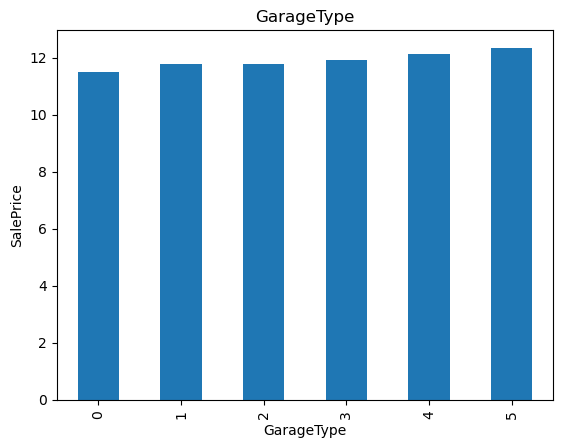

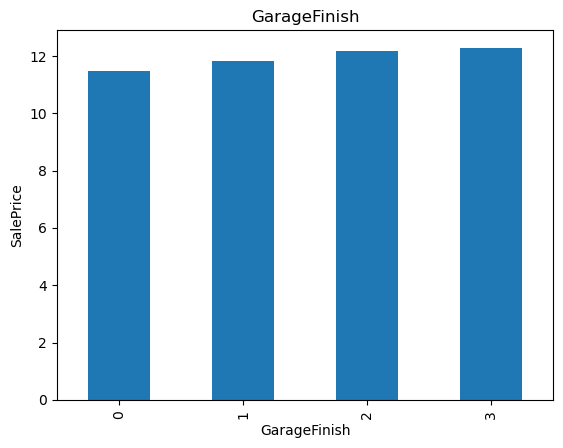

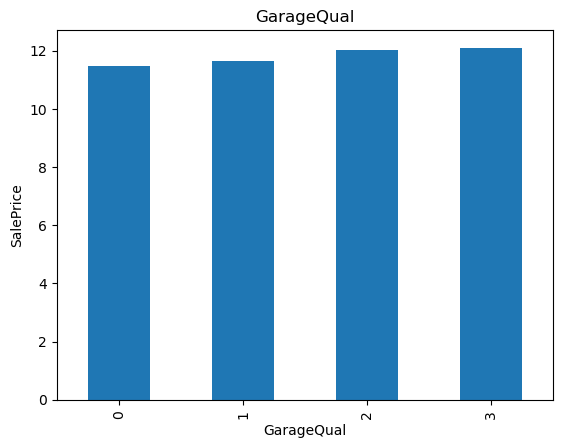

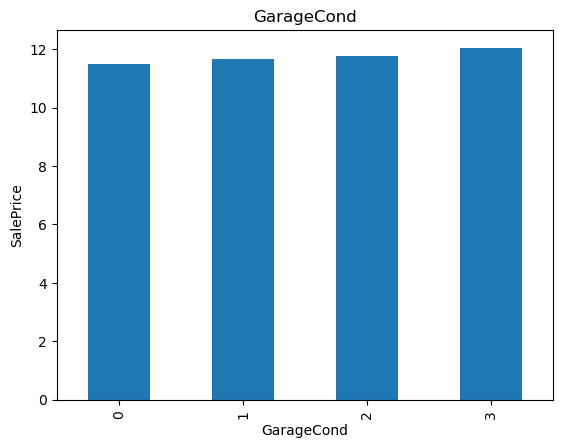

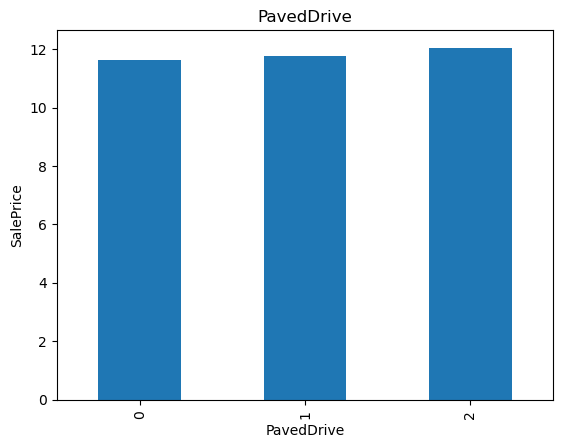

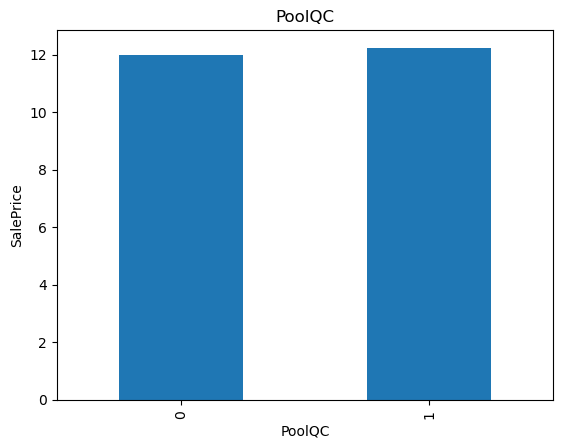

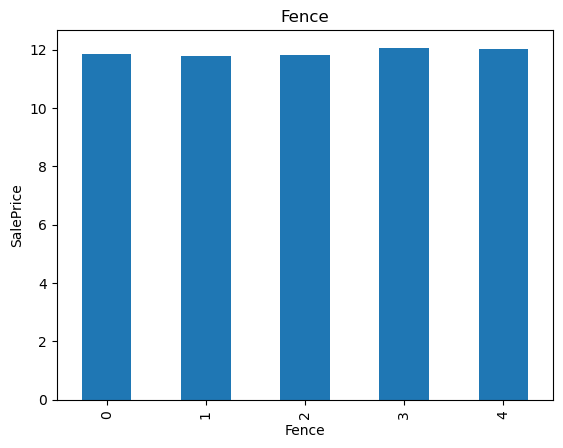

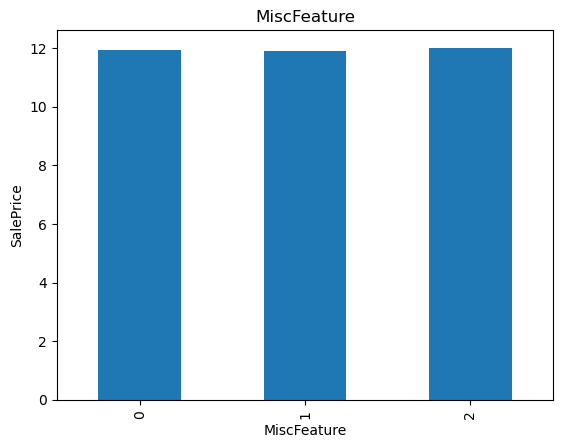

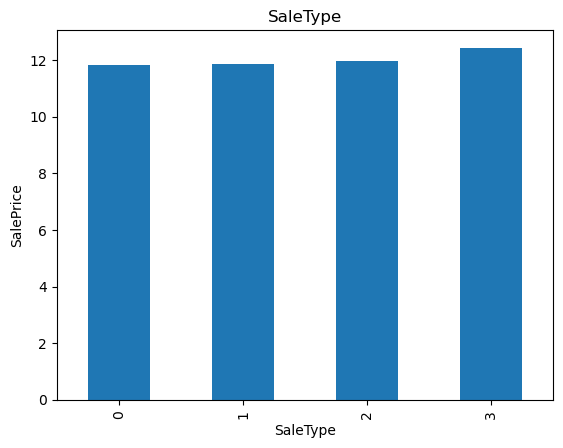

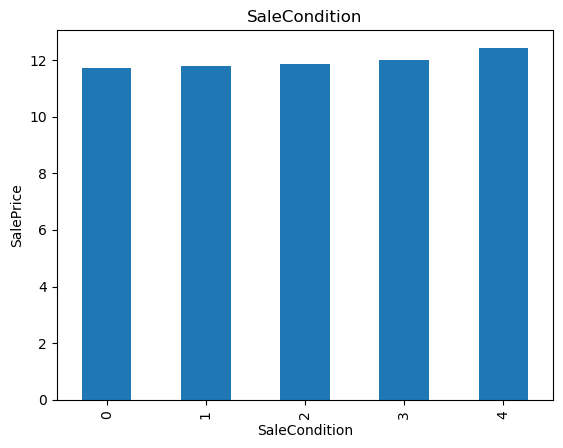

In [47]:
# relacion monotonica entre etiquetas y target 
def analyse_vars(df, var):
    
    # función traza el precio medio de venta de la casa por codificado
    # categoría
    
    df = df.copy()
    df.groupby(var)['SalePrice'].median().plot.bar()
    plt.title(var)
    plt.ylabel('SalePrice')
    plt.show()
    
for var in cat_vars:
    analyse_vars(X_train, var)

La relación monótona es particularmente clara para las variables MSZoning, Neighborhood y ExterQual. Observe cómo, cuanto mayor sea el número entero que ahora representa la categoría, mayor será el precio medio de venta de la vivienda.

(recuerde que el objetivo se transforma logarítmicamente, por eso las diferencias parecen tan pequeñas).

## Escalado de características

Para su uso en modelos lineales, las características deben escalarse o normalizarse. En la siguiente sección, escalaré las características a los valores mínimo y máximo:

In [48]:
# capturar todas las variables en una lista
# exceptuando el target y el ID

train_vars = [var for var in X_train.columns if var not in ['Id', 'SalePrice']]

# contar el numero de variables
len(train_vars)

82

In [49]:
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
930,931,20,3,4.290459,9.096612,1,2,1,3,1,0,0,19,2,1,3,3,8,5,2,2,0,0,10,10,0,0.0,2,3,4,3,3,3,6,16,4,0,1450,1466,2,4,1,3,7.290293,0,0,7.290293,0,0,2,0,3,1,2,7,4,0,1,4,2.0,3,3,610,2,3,2,100,18,0,0,0,0,0,3,2,0,7,2009,2,3,12.211060,0,0,0
656,657,20,3,4.276666,9.211040,1,2,1,1,1,0,0,8,2,1,3,3,5,7,49,2,0,0,6,6,2,54.0,2,3,2,2,3,1,4,806,4,0,247,1053,2,4,1,3,6.959399,0,0,6.959399,1,0,1,1,3,1,2,5,4,0,1,4,49.0,2,1,312,2,3,2,0,0,0,0,0,0,0,2,2,0,8,2008,2,3,11.887931,0,0,0
45,46,120,3,4.110874,8.943506,1,2,0,1,1,0,0,21,2,1,4,3,9,5,5,5,2,0,3,2,2,412.0,3,3,4,4,3,1,6,456,4,0,1296,1752,2,4,1,3,7.468513,0,0,7.468513,1,0,2,0,2,1,3,6,4,1,4,4,5.0,2,2,576,2,3,2,196,82,0,0,0,0,0,3,2,0,2,2010,2,3,12.675764,0,0,0
1348,1349,20,3,4.094345,9.692520,1,2,2,2,1,0,0,10,2,1,3,3,7,5,9,9,0,0,10,10,0,0.0,2,3,4,3,3,4,6,1443,4,0,39,1482,2,4,1,3,7.309212,0,0,7.309212,1,0,2,0,3,1,2,5,4,1,2,4,9.0,2,2,514,2,3,2,402,25,0,0,0,0,0,3,2,0,8,2007,2,3,12.278393,1,0,0
55,56,20,3,4.605170,9.227689,1,2,1,1,1,0,0,8,2,1,3,3,6,5,44,44,0,0,6,7,2,272.0,1,3,2,2,3,1,2,490,4,0,935,1425,2,3,1,3,7.261927,0,0,7.261927,0,0,2,0,3,1,1,7,4,1,4,4,44.0,2,2,576,2,3,2,0,0,0,407,0,0,0,3,2,0,7,2008,2,3,12.103486,0,0,0


In [50]:
# crear el escalador
scaler = MinMaxScaler()

#  fit  el scaler al set de train
scaler.fit(X_train[train_vars]) 

# transformar el set train y test
X_train[train_vars] = scaler.transform(X_train[train_vars])

X_test[train_vars] = scaler.transform(X_test[train_vars])

In [51]:
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
930,931,0.000000,0.75,0.461171,0.377048,1.0,1.0,0.333333,1.000000,1.0,0.0,0.0,0.863636,0.4,1.0,0.75,0.6,0.777778,0.50,0.014706,0.049180,0.0,0.0,1.0,1.0,0.000000,0.00000,0.666667,1.0,1.0,0.75,0.75,0.75,1.000000,0.002835,0.666667,0.0,0.673479,0.239935,1.0,1.00,1.0,1.0,0.559760,0.0,0.0,0.523250,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.000000,0.2,0.8,0.018692,1.000000,0.75,0.430183,0.666667,1.0,1.0,0.116686,0.032907,0.0,0.000000,0.0,0.0,0.0,0.75,1.0,0.0,0.545455,0.75,0.666667,0.75,12.211060,0.0,0.0,0.0
656,657,0.000000,0.75,0.456066,0.399443,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.444444,0.75,0.360294,0.049180,0.0,0.0,0.6,0.6,0.666667,0.03375,0.666667,1.0,0.5,0.50,0.75,0.25,0.666667,0.142807,0.666667,0.0,0.114724,0.172340,1.0,1.00,1.0,1.0,0.434539,0.0,0.0,0.406196,0.333333,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.250000,1.0,0.000000,0.2,0.8,0.457944,0.666667,0.25,0.220028,0.666667,1.0,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.50,1.0,0.0,0.636364,0.50,0.666667,0.75,11.887931,0.0,0.0,0.0
45,46,0.588235,0.75,0.394699,0.347082,1.0,1.0,0.000000,0.333333,1.0,0.0,0.0,0.954545,0.4,1.0,1.00,0.6,0.888889,0.50,0.036765,0.098361,1.0,0.0,0.3,0.2,0.666667,0.25750,1.000000,1.0,1.0,1.00,0.75,0.25,1.000000,0.080794,0.666667,0.0,0.601951,0.286743,1.0,1.00,1.0,1.0,0.627205,0.0,0.0,0.586296,0.333333,0.0,0.666667,0.0,0.250,0.333333,1.000000,0.333333,1.0,0.333333,0.8,0.8,0.046729,0.666667,0.50,0.406206,0.666667,1.0,1.0,0.228705,0.149909,0.0,0.000000,0.0,0.0,0.0,0.75,1.0,0.0,0.090909,1.00,0.666667,0.75,12.675764,0.0,0.0,0.0
1348,1349,0.000000,0.75,0.388581,0.493677,1.0,1.0,0.666667,0.666667,1.0,0.0,0.0,0.454545,0.4,1.0,0.75,0.6,0.666667,0.50,0.066176,0.163934,0.0,0.0,1.0,1.0,0.000000,0.00000,0.666667,1.0,1.0,0.75,0.75,1.00,1.000000,0.255670,0.666667,0.0,0.018114,0.242553,1.0,1.00,1.0,1.0,0.566920,0.0,0.0,0.529943,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.250000,1.0,0.333333,0.4,0.8,0.084112,0.666667,0.50,0.362482,0.666667,1.0,1.0,0.469078,0.045704,0.0,0.000000,0.0,0.0,0.0,0.75,1.0,0.0,0.636364,0.25,0.666667,0.75,12.278393,1.0,0.0,0.0
55,56,0.000000,0.75,0.577658,0.402702,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.555556,0.50,0.323529,0.737705,0.0,0.0,0.6,0.7,0.666667,0.17000,0.333333,1.0,0.5,0.50,0.75,0.25,0.333333,0.086818,0.666667,0.0,0.434278,0.233224,1.0,0.75,1.0,1.0,0.549026,0.0,0.0,0.513216,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.333333,0.416667,1.0,0.333333,0.8,0.8,0.411215,0.666667,0.50,0.406206,0.666667,1.0,1.0,0.000000,0.000000,0.0,0.801181,0.0,0.0,0.0,0.75,1.0,0.0,0.545455,0.50,0.666667,0.75,12.103486,0.0,0.0,0.0


In [52]:
# Guardemos ahora el set de train y el de test
X_train.to_csv('xtrain.csv', index=False)
X_test.to_csv('xtest.csv', index=False)